In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
train_path=r"C:\Users\NEERAJ SINGH\Desktop\Major_project\videodataset\train"
test_path=r"C:\Users\NEERAJ SINGH\Desktop\Major_project\videodataset\test"
val_path=r"C:\Users\NEERAJ SINGH\Desktop\Major_project\videodataset\val"

In [3]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)


x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)


In [4]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [5]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


In [7]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

Found 10734 images belonging to 30 classes.
Found 1 images belonging to 30 classes.
Found 1381 images belonging to 30 classes.


In [8]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [9]:
training_set.class_indices
val_set.class_indices

{'AerialView': 0,
 'AirPlane': 1,
 'Animation': 2,
 'Building': 3,
 'CompositionFrame': 4,
 'Crowd': 5,
 'DisplayScreen': 6,
 'Forest': 7,
 'Garden': 8,
 'Graphics': 9,
 'Helicopter': 10,
 'Hospital': 11,
 'IndoorControlRoom': 12,
 'IndoorGeneric': 13,
 'IndoorHome': 14,
 'IndoorLab': 15,
 'Interview': 16,
 'Launch': 17,
 'Logo': 18,
 'Mountain': 19,
 'OutdoorAntenna': 20,
 'OutdoorGeneric': 21,
 'OutdoorLaunchpad': 22,
 'PersonCloseUp': 23,
 'Satellite': 24,
 'Sky': 25,
 'Speech': 26,
 'Text': 27,
 'Traffic': 28,
 'Vehicle': 29}

In [10]:
training_set.class_indices
train_y.shape,test_y.shape
IMAGE_SIZE = [224, 224]

In [11]:
vgg = VGG19( input_shape=IMAGE_SIZE +[3],weights='imagenet', include_top=False)

In [12]:
for layer in vgg.layers:
    layer.trainable = False

In [13]:
x = Flatten()(vgg.output)

In [14]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(30, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model.compile(
               loss='sparse_categorical_crossentropy',
               optimizer="adam",
               metrics=['accuracy']
)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model
batch_size=32

In [18]:
# fit the model
history = model.fit(
                    train_x,
                    train_y,
                    validation_data=(val_x,val_y),
                    epochs=50,
                    batch_size=32,
                    steps_per_epoch=len(train_x)/batch_size
#                     steps_per_epoch=
                    
                   
)

Epoch 1/2
335/335 [==============================] - 4232s 13s/step - loss: 1.0948 - accuracy: 0.7215 - val_loss: 4.0535 - val_accuracy: 0.3411
Epoch 2/2
335/335 [==============================] - 4022s 12s/step - loss: 0.2286 - accuracy: 0.9519 - val_loss: 4.5892 - val_accuracy: 0.3534


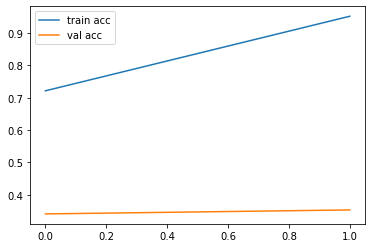

In [19]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()


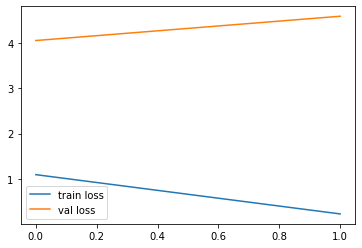

In [20]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [22]:
print(confusion_matrix(y_pred,test_y))

NameError: name 'y_pred' is not defined

In [22]:
model.save('vgg19model.h5')

In [ ]:
import pickle
pickle.dump(model,open('model.pickle','wb'))



In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [2]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
y_pred

NameError: name 'model' is not defined

In [ ]:
print(classification_report(y_pred,test_y))

In [1]:
print(confusion_matrix(y_pred,test_y))

NameError: name 'confusion_matrix' is not defined